# Risk Adjusted Performance Metrics (Sharpe Ratio)

## Sharpe Ratio & Risk Free Asset Definition

$$
SharpeRatio = \frac{PortReturn - RFR}{PortRisk} 
$$

- RFR : As an approximation usually used the annual yield of government issued bond

In [467]:
risk_free_return = 0.0635 #indonesia 5 years gov bond coupon rate 
risk_free_rate = 0 # as government bond will almost never default this is the 0 is always the risk free rate 
rf = [risk_free_return, risk_free_rate]

In [468]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

In [469]:
port = pd.DataFrame()
tickers = ['ITMG.jk', 'ADRO.jk', 'AMRT.jk', 'MPMX.jk', 'APIC.jk', 'HEXA.jk', 'MFIN.jk', 'MBAP.jk', 'BYAN.jk', 'MTDL.jk', 'BSSR.jk','ADMF.jk','INCO.jk','ARNA.jk', 'UNTR.jk'] #,
# tickers = ['ANTM.jk', 'ASII.jk', 'BBCA.jk', 'BBRI.jk', 'BMRI.jk', 'ICBP.jk', 'JSMR.jk', 'MEDC.jk', 'PGAS.jk', 'PTBA.jk', 'PTPP.jk', 'PWON.jk', 'SMRA.jk','TLKM.jk', 'UNVR.jk', 'WSKT.jk']
for ticker in tickers:
    port[ticker] = wb.get_data_yahoo(ticker, start = '2019-04-01', end = '2023-04-30')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

## Portfolio Analysis With Sharpe Ratio

### Recreating 100K Random Portfolios

In [470]:
def annual_return(return_df) : 
    summary = return_df.agg(['mean', 'std']).T
    summary.columns = ['return', 'risk']
    summary['return'] = summary['return'] * 250
    summary['risk'] = summary['risk'] * 250**0.5
    return summary

ret = port.pct_change().dropna()
annual_ret = annual_return(ret)

In [471]:
annual_ret

,return,risk
ITMG.jk,0.358934,0.449710
ADRO.jk,0.411732,0.472058
AMRT.jk,0.392441,0.426659
MPMX.jk,0.377254,0.446787
APIC.jk,0.241872,0.266538
HEXA.jk,0.386666,0.319469
MFIN.jk,0.260833,0.379647
MBAP.jk,0.406822,0.405913
BYAN.jk,0.816583,0.529028
MTDL.jk,0.362412,0.443812


In [472]:
port_amount = len(port.columns)
nop = 100_000

np.random.seed(123) #just to make sure it consistenly generated random number
matrix = np.random.random(port_amount * nop).reshape(nop,port_amount)
norm_port = matrix / matrix.sum(axis = 1, keepdims = True)

port_ret = ret.dot(norm_port.T)
summary = annual_return(port_ret)

summary

,return,risk
0,0.338980,0.180058
1,0.355366,0.182262
2,0.388586,0.188549
3,0.342882,0.171170
4,0.314606,0.174502
...,...,...
99995,0.347093,0.208835
99996,0.370948,0.171598
99997,0.344872,0.183398
99998,0.352618,0.175720


### Caclulating Sharpe Ratio

In [473]:
annual_ret['sharpe'] = (annual_ret['return'].sub(rf[0])) / annual_ret['risk']
annual_ret.sort_values('sharpe', ascending = False)

,return,risk,sharpe
BYAN.jk,0.816583,0.529028,1.423522
HEXA.jk,0.386666,0.319469,1.011572
MBAP.jk,0.406822,0.405913,0.845803
AMRT.jk,0.392441,0.426659,0.770970
ADRO.jk,0.411732,0.472058,0.737689
MPMX.jk,0.377254,0.446787,0.702246
BSSR.jk,0.455239,0.560655,0.698716
MTDL.jk,0.362412,0.443812,0.673511
APIC.jk,0.241872,0.266538,0.669218
ITMG.jk,0.358934,0.449710,0.656943


In [474]:
summary['sharpe']= (summary['return'].sub(rf[0]))/summary['risk']
summary

,return,risk,sharpe
0,0.338980,0.180058,1.529949
1,0.355366,0.182262,1.601356
2,0.388586,0.188549,1.724145
3,0.342882,0.171170,1.632189
4,0.314606,0.174502,1.438986
...,...,...,...
99995,0.347093,0.208835,1.357980
99996,0.370948,0.171598,1.791680
99997,0.344872,0.183398,1.534210
99998,0.352618,0.175720,1.645329


In [475]:
summary.describe()

,return,risk,sharpe
count,100000.000000,100000.000000,100000.000000
mean,0.351049,0.188984,1.527591
std,0.024105,0.012688,0.155601
min,0.258758,0.146941,0.940332
25%,0.333944,0.180181,1.415991
50%,0.351112,0.188176,1.530178
75%,0.367858,0.197015,1.638809
max,0.453880,0.256822,2.066277


 ### Visualizing Sharpe Ratio

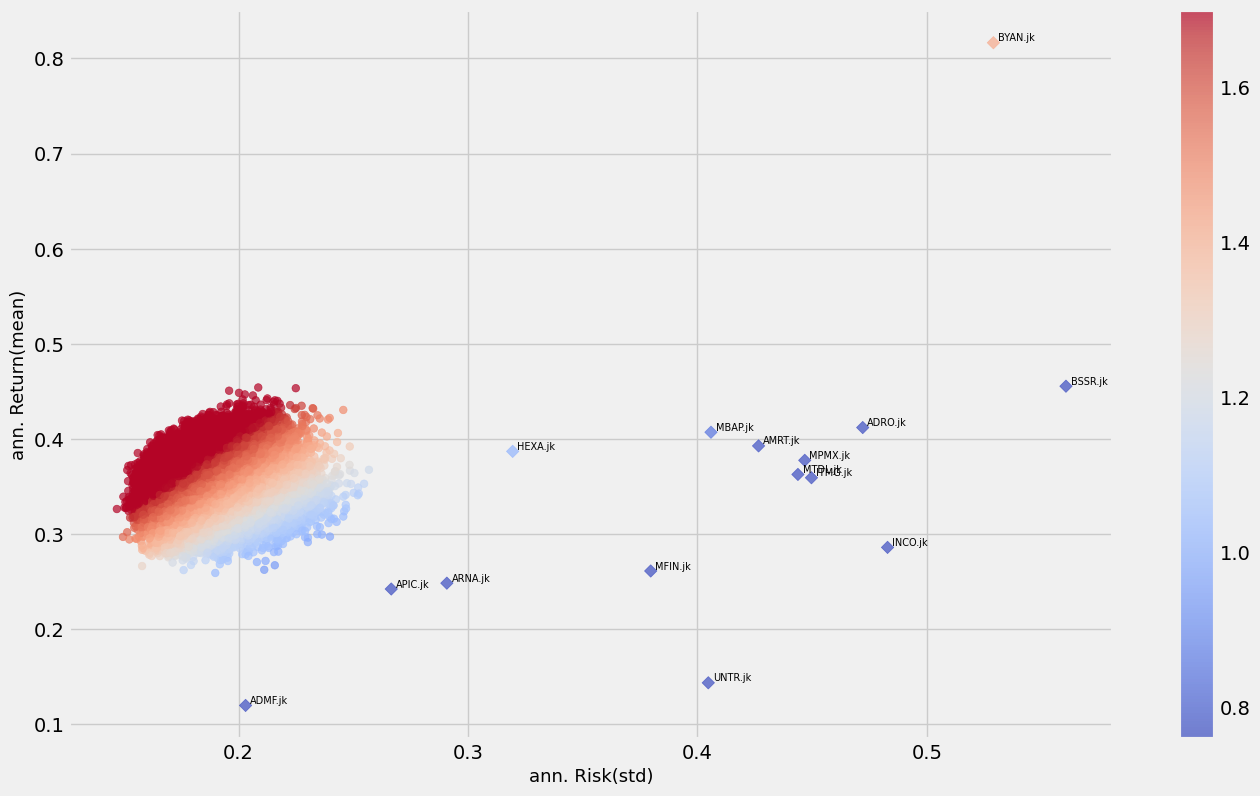

In [476]:
plt.figure(figsize = (15,9))
plt.scatter(summary.loc[:, "risk"], summary.loc[:, "return"], s = 30,
            c =summary.loc[:,'sharpe'],cmap ='coolwarm', vmin = 0.76, vmax = 1.7, alpha = 0.7)
plt.colorbar()
plt.scatter(annual_ret.loc[:, "risk"], annual_ret.loc[:, "return"], s = 40, marker = "D",
            c =annual_ret.loc[:,'sharpe'],cmap ='coolwarm', vmin = 0.76, vmax = 1.7, alpha = 0.7)
for i in annual_ret.index:
    plt.annotate(i, xy = ((annual_ret.loc[i, 'risk'] + 0.002, annual_ret.loc[i, 'return'] + 0.002)), size = 7)
plt.xlabel('ann. Risk(std)', fontsize = 13)
plt.ylabel('ann. Return(mean)', fontsize = 13)
plt.show()

## Finding the Optimum Porfolio - The Max Sharpe Ratio

### Checking 100K Random Porfolios

In [477]:
summary.head()

,return,risk,sharpe
0,0.338980,0.180058,1.529949
1,0.355366,0.182262,1.601356
2,0.388586,0.188549,1.724145
3,0.342882,0.171170,1.632189
4,0.314606,0.174502,1.438986


In [478]:
summary.describe()

,return,risk,sharpe
count,100000.000000,100000.000000,100000.000000
mean,0.351049,0.188984,1.527591
std,0.024105,0.012688,0.155601
min,0.258758,0.146941,0.940332
25%,0.333944,0.180181,1.415991
50%,0.351112,0.188176,1.530178
75%,0.367858,0.197015,1.638809
max,0.453880,0.256822,2.066277


### Finding Portfolio Index With The Highest Sharpe Ratio

In [479]:
msrp = summary['sharpe'].idxmax()
msrp

27982

In [480]:
msrp_summary = summary.iloc[msrp, :]
msrp_summary

return    0.403842
risk      0.164713
sharpe    2.066277
Name: 27982, dtype: float64

### Weight of The Portfoluo With The Highest Sharpe Ratio

In [481]:
msrp_weight = norm_port[msrp,:]
msrp_weight

array([0.03818299, 0.01699686, 0.12017746, 0.10157463, 0.14254578,
       0.11181824, 0.06417645, 0.02660417, 0.15992169, 0.0252547 ,
       0.05739283, 0.02380981, 0.00106705, 0.07196297, 0.03851437])

#### Weight of Each Portfolios

In [482]:
pd.Series(index = port.columns, data = msrp_weight).sort_values(ascending = False)

BYAN.jk    0.159922
APIC.jk    0.142546
AMRT.jk    0.120177
HEXA.jk    0.111818
MPMX.jk    0.101575
ARNA.jk    0.071963
MFIN.jk    0.064176
BSSR.jk    0.057393
UNTR.jk    0.038514
ITMG.jk    0.038183
MBAP.jk    0.026604
MTDL.jk    0.025255
ADMF.jk    0.023810
ADRO.jk    0.016997
INCO.jk    0.001067
dtype: float64

# Appendix

## Optimization portfolio

Method Might not work on some portfolios 

In [483]:
import scipy.optimize as sco

In [484]:
ret.head() #stocks daily return on the selected period

,ITMG.jk,ADRO.jk,AMRT.jk,MPMX.jk,APIC.jk,HEXA.jk,MFIN.jk,MBAP.jk,BYAN.jk,MTDL.jk,BSSR.jk,ADMF.jk,INCO.jk,ARNA.jk,UNTR.jk
Date,,,,,,,,,,,,,,,
2019-04-02,0.003145,-0.018519,-0.011111,0.096154,0.009009,0.013115,0.033333,0.010489,0.000000,-0.033019,-0.012605,0.000000,-0.016901,0.000000,-0.022873
2019-04-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-04,-0.045932,-0.037736,0.028090,-0.035088,-0.017857,0.000000,-0.013825,-0.024221,0.005291,0.014634,-0.008511,-0.004706,-0.008596,-0.009804,-0.007491
2019-04-05,-0.023952,-0.011765,0.000000,-0.004545,0.045455,0.022654,0.000000,-0.003546,0.000000,0.048077,-0.012876,0.016549,0.000000,0.009901,-0.004717
2019-04-08,-0.038037,0.000000,0.000000,0.018265,-0.008696,0.000000,0.009346,-0.035587,0.000000,0.036697,-0.008696,-0.011628,-0.026012,-0.019608,-0.018009


In [485]:
noa = len(ret.columns)
noa # number of assests

15

## Calculation of weights

In [486]:
#calculate annualized portfolio return (based on weights)
def port_ret(weights):
    return ret.dot(weights.T).mean() * 250

In [487]:
#calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    return ret.dot(weights.T).std() * np.sqrt(250)

In [488]:
#define function to be minimized (sco only supports minimize, not maximize)
#-> maximize sharpe ratio == minimize sharpe ratio * (-1)
def min_func_sharpe(weights): 
     return (rf[0] - port_ret(weights)) / port_vol(weights) #sharpe ratio * (-1)

### Optimization Calculation 

In [489]:
eweights = np.full(noa , 1/noa)
eweights

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

In [490]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [491]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0,1) for x in range(noa))

In [492]:
opts = sco.minimize(min_func_sharpe, eweights, method = "SLSQP", bounds = bnds, constraints= cons)
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.2330066210842756
       x: [ 3.426e-17  2.031e-16 ...  1.410e-01  1.595e-16]
     nit: 14
     jac: [-1.204e-01 -2.207e-01 ... -3.827e-01  7.904e-01]
    nfev: 236
    njev: 14

In [493]:
optimum_weight = result['x']

In [494]:
port_ret(optimum_weight)

ValueError: Dot product shape mismatch, (1003, 15) vs (14,)

In [ ]:
port_vol(optimum_weight)

In [ ]:
-min_func_sharpe(optimum_weight)

In [ ]:
opt_weight = pd.Series(index = ret.columns, data = optimum_weight)
opt_weight